# Title of Project: PCA Analysis on Speeches in Homer's works

Team members: Emily Greven

##Abstract

Problem is to determine the similarity between characters when they are speaking, similarity between characters based on how they are addressed in speeches, similarity between gods, animals, mortals in thier speeches, similarity between works and books by Homer.

Used CLTK, and their embeddings model based on NLPL and the entirety of the Greek language (want to make my own embeddings model for just Homer works), PCA from sklearn to plot the similarities between various parameters.


# Results FIX THIS

Presentation of the results, including any useful illustrations, pseudo-code, etc. necessary to understand what you have done. This should be something that can be read separately by someone who does not know much about the topic: restate the problem definition and why it is interesting, then summarize the approach taken and how you proceeded (this would be an updated plan, after the project is done), and finally a presentation of your results, including illustrations and figures as needed, how you evaluated the results,

# Future work:

- Address issues with data:
  - Iliad book 16 is not included because the github text from cltk repeats book 17 twice. Need to include the 3 speeches from book 16 Iliad
  - Odyssey Book 1 starting at line 79 is off by 1 line for the remainder of the book

- Swap out pretrained model from NLPL to a specially created one based on the text being used so that the word embeddings are more accurate

- Sentiment analysis compare how Homer characterizes the speech and see if that sentiment can be measured accurately as similar to the actual speech sentiment 

https://chs.harvard.edu/chapter/2-characterization-in-homer-and-agamemnons-appeal-in-iliad-4/

# Sources:
/

# Mount drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Dependencies

In [36]:

import pandas as pd
import numpy as np
# https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8

In [37]:
## Requires Python 3.7, 3.8, 3.9, 3.10 on a POSIX-compliant OS

## The latest published beta:
!pip install -U spacy
!pip install -U srsly
!pip install -U scipy==1.9.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install -U cltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# For most users, this is the only import required
from cltk import NLP
from cltk.dependency.tree import DependencyTree

In [40]:
from cltk.utils.feature_extraction import cltk_doc_to_features_table

In [41]:
from pprint import pprint

# Initialize NLP for greek

In [42]:
cltk_nlp_grc = NLP(language="grc")

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Ancient Greek' (ISO: 'grc'): `GreekNormalizeProcess`, `GreekStanzaProcess`, `GreekEmbeddingsProcess`, `StopsProcess`.


# Example on full text without index for lines

In [43]:
# read the Ancient Greek file
with open("/content/drive/MyDrive/CS505/CS 505 - Final Project/IliadBook1.txt") as fo:
    iliad_full = fo.read()

# Cut this down to roughly 10k tokens for this demonstration's purposes
small_iliad = iliad_full[:len(iliad_full) // 7]
print("Approximate token count:", len(small_iliad.split()))


%time cltk_doc_grc = cltk_nlp_grc.analyze(text=small_iliad)
feature_names_grc, list_of_list_features_grc = cltk_doc_to_features_table(cltk_doc=cltk_doc_grc)

print(feature_names_grc)
print("Example of one instance row:", list_of_list_features_grc[4][2])
# Putting these together for easier reading
pprint(list(zip(feature_names_grc, list_of_list_features_grc[4])))
# You will be asked to download some models (from CLTK, fastText, and Stanza)

Approximate token count: 648
CPU times: user 5.62 s, sys: 184 ms, total: 5.81 s
Wall time: 7.52 s
['string', 'lemma', 'embedding', 'is_stop', 'lemma', 'pos', 'case', 'gender', 'animacy', 'number', 'definiteness', 'degree', 'strength', 'verbform', 'tense', 'mood', 'aspect', 'voice', 'person', 'polarity', 'politeness', 'clusivity', 'evidentiality', 'strength', 'governing_word', 'governor_case', 'governor_gender', 'governor_animacy', 'governor_number', 'governor_definiteness', 'governor_degree', 'governor_strength', 'governor_verbform', 'governor_tense', 'governor_mood', 'governor_aspect', 'governor_voice', 'governor_person', 'governor_polarity', 'governor_politeness', 'governor_clusivity', 'governor_evidentiality', 'governor_strength', 'governing_relationship']
Example of one instance row: [ 1.48483e-01 -1.92392e-01  3.06940e-01 -4.94171e-01  1.14057e-01
 -3.84685e-01  9.93910e-02 -3.13190e-01 -1.91057e-01  2.68086e-01
  1.32013e-01  6.26260e-02  1.15521e-01 -2.79880e-01  3.83551e-01
  7

# Download json for texts from cltk github

In [44]:
df_iliad = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/json/homer__iliad.json")

# df_odyssey = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homer__odyssey__grc.json")

df_odyssey = pd.read_json("/content/drive/MyDrive/CS505/CS 505 - Final Project/homer__odyssey__grc.json")



In [45]:
# 33 Hymns
#  Aphrodite: 5, 6, 10
#  Artemis: 9, 27,
#  Athena: 11, 28
#  Apollo: 21, 25
#  Muses and Apollo: 25,
#  Dionysus: 1, 7, 26,
#  Demeter: 2, 13,
#  Dioscuri: 17, 33
#  Hermes: 4, 18
#  Hestia: 24, 29

#  Earth: 30
#  Hera: 12,
#  Hercales: 15,
#  Hephaestus: 20,
#  Helios: 31
#  Delian and Pythian Apollo: 3,
#  Ares: 8,
#  Asclepius: 16, 
#  Mother of the gods: 15,
#  Pan: 19,
#  Poseidon: 22,
#  Selene: 32
#  Zeus: 23,

#  1 - 10
df_hymn1_dionysus = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-1-to-dionysus__grc.json")
df_hymn2_demeter = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-2-to-demeter__grc.json")
df_hymn3_delian_and_pythian_apollo = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-3-to-delian-and-pythian-apollo__grc.json")
df_hymn4_hermes = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-4-to-hermes__grc.json")
df_hymn5_aphrodite = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-5-to-aphrodite__grc.json")
df_hymn6_aphrodite = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-6-to-aphrodite__grc.json")
df_hymn7_dionysus = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-7-to-dionysus__grc.json")
df_hymn8_ares = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-8-to-ares__grc.json")
df_hymn9_artemis = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-9-to-artemis__grc.json")
df_hymn10_aphrodite = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-10-to-aphrodite__grc.json")

#  11 - 20
df_hymn11_athena = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-11-to-athena__grc.json")
df_hymn12_hera = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-12-to-hera__grc.json")
df_hymn13_demeter = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-13-to-demeter__grc.json")
df_hymn14_mother_of_the_gods = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-14-to-the-mother-of-the-gods__grc.json")
df_hymn15_hercales = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-15-to-heracles__grc.json")
df_hymn16_asclepius = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-16-to-asclepius__grc.json")
df_hymn17_dioscuri = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-17-to-the-dioscuri__grc.json")
df_hymn18_hermes = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-18-to-hermes__grc.json")
df_hymn19_pan = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-19-to-pan__grc.json")
df_hymn20_hephaestus = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-20-to-hephaestus__grc.json")

#  21 - 30
df_hymn21_apollo = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-21-to-apollo__grc.json")
df_hymn22_poseidon = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-22-to-poseidon__grc.json")
df_hymn23_zeus = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-23-to-zeus__grc.json")
df_hymn24_hestia = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-24-to-hestia__grc.json")
df_hymn25_muses_and_apollo = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-25-to-the-muses-and-apollo__grc.json")
df_hymn26_dionysus = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-26-to-dionysus__grc.json")
df_hymn27_artemis = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-27-to-artemis__grc.json")
df_hymn28_athena = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-28-to-athena__grc.json")
df_hymn29_hestia = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-29-to-hestia__grc.json")
df_hymn30_earth = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-30-to-earth__grc.json")

# 31 - 33
df_hymn31_helios = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-31-to-helios__grc.json")
df_hymn32_selene = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-32-to-selene__grc.json")
df_hymn33_dioscuri = pd.read_json("https://raw.githubusercontent.com/cltk/grc_text_perseus/master/cltk_json/homeric-hymns__hymn-33-to-the-dioscuri__grc.json")


In [46]:
df_iliad.head()
df_iliad.columns

Index(['meta', 'work', 'author', 'text'], dtype='object')

In [47]:
df_odyssey.columns

Index(['language', 'englishTitle', 'original-urn', 'author', 'urn', 'text',
       'source', 'originalTitle', 'edition', 'sourceLink', 'meta'],
      dtype='object')

# Embeddings function based on default model from NLPL on all greek words

In [48]:
def embeddings_per_text(text):
  cltk_doc_grc = cltk_nlp_grc.analyze(text=text)
  feature_names_grc, list_of_list_features_grc = cltk_doc_to_features_table(cltk_doc=cltk_doc_grc)
  # print("Example of one instance row:", list_of_list_features_grc[4][2])  
  list_embeddings = [ list_of_list_features_grc[i][2] for i in range(len(list_of_list_features_grc))]
  # print("here", len(list_embeddings))
  return sum(list_embeddings) / len(list_embeddings)


In [49]:

first_speech = [df_iliad["text"][1][str(line)] for line in range(17, 22)]
string_first_speech = " ".join(first_speech)
print(first_speech)

['Ἀτρεΐδαι τε καὶ ἄλλοι ἐϋκνήμιδες Ἀχαιοί,', 'ὑμῖν μὲν θεοὶ δοῖεν Ὀλύμπια δώματ᾽ ἔχοντες', 'ἐκπέρσαι Πριάμοιο πόλιν, εὖ δ᾽ οἴκαδ᾽ ἱκέσθαι:', 'παῖδα δ᾽ ἐμοὶ λύσαιτε φίλην, τὰ δ᾽ ἄποινα δέχεσθαι,', 'ἁζόμενοι Διὸς υἱὸν ἑκηβόλον Ἀπόλλωνα.']


In [50]:
print(len(embeddings_per_text(string_first_speech)))

100


In [51]:
first_speech = [df_odyssey["text"][1][str(line)] for line in range(17, 22)]
string_first_speech = " ".join(first_speech)
print(first_speech)

['Ἴλιον εἰς ἐύπωλον ἔβη κοίλῃς ἐνὶ νηυσίν,', 'Ἄντιφος αἰχμητής· τὸν δʼ ἄγριος ἔκτανε Κύκλωψ', 'ἐν σπῆι γλαφυρῷ, πύματον δʼ ὡπλίσσατο δόρπον.', 'τρεῖς δέ οἱ ἄλλοι ἔσαν, καὶ ὁ μὲν μνηστῆρσιν ὁμίλει,', 'Εὐρύνομος, δύο δʼ αἰὲν ἔχον πατρώια ἔργα.']


# Get speech indicies 

this was from https://www.dsgep.ugent.be/iliad/ and I formated it into a spreadsheet then exported as csv. 

In [52]:
# https://docs.google.com/spreadsheets/d/1WT_n2mKo4mjxJWP2xVQcq4hBzAKUrDjSJtFUWaFUz_0/edit?usp=sharing

df_speeches = pd.read_csv("/content/drive/MyDrive/CS505/CS 505 - Final Project/speech lines Iliad.csv")
df_speeches_reduced = df_speeches[['nr.', 'book', 'starts on line', 'ends on line', 'speaker',
        'mortal/god', 'addressee']]


In [55]:
df_speeches_odyssey = pd.read_csv("/content/drive/MyDrive/CS505/CS 505 - Final Project/speech lines Odyssey.csv")
print(df_speeches_odyssey.columns)

df_speeches_reduced_odyssey = df_speeches_odyssey[["nr.", "book", "from line", "to line", "speaker", "mortal/god", "addressee"]]

Index(['nr.', 'book', 'from line', 'to line', 'speaker', 'speech/this speaker',
       'mortal/god', 'anonymous?', 'disguise?', 'length', 'dialogue?',
       'addressee'],
      dtype='object')


In [56]:
# ODYSSEY: indexed books at 0-23 AND lines index starts at 0
#  missing book 1 lines 79, 80
dict_speeches_text_odyssey = {}

for speech_idx, book_num, start_line, end_line, speaker, mortal_or_god, addressee in df_speeches_reduced_odyssey.itertuples(index=False):
  start_line = start_line - 1
  end_line = end_line -1
  print( speech_idx, book_num-1, start_line, end_line, speaker, mortal_or_god, addressee)
  
  # if end_line+1 == 79 and book_num-1==0:
  #   text_string = " ".join([df_odyssey["text"][book_num-1][str(line)] for line in range(start_line, 79)]) + " τὸν δ᾽ ἠμείβετ᾽ ἔπειτα θεά, γλαυκῶπις Ἀθήνη: "
  #   dict_speeches_text_odyssey[speech_idx] = {"text" : text_string, "speaker": speaker, "mortal_or_god": mortal_or_god, "addressee": addressee, "book_num": book_num-1}
  # print("this is start line: ", start_line)
  # if start_line == 80 and book_num-1 == 0:
  #   text_string = " ‘ὦ πάτερ ἡμέτερε Κρονίδη, ὕπατε κρειόντων, " + " ".join([df_odyssey["text"][book_num-1][str(line)] for line in range(start_line+1, end_line+1)]) 
  #   dict_speeches_text_odyssey[speech_idx] = {"text" : text_string, "speaker": speaker, "mortal_or_god": mortal_or_god, "addressee": addressee, "book_num": book_num-1}
  # if book_num-1 ==0 and start_line == 221 and end_line == 228:

  if str(start_line) not in df_odyssey["text"][book_num-1] and start_line != 80:
    print("This book", book_num-1, " does not have this start line:", start_line, " in the JSON ODYSSEY")
  
  else:
    text_string = " ".join([df_odyssey["text"][book_num-1][str(line)] for line in range(start_line, end_line+1)])
    dict_speeches_text_odyssey[speech_idx] = {"text" : text_string, "speaker": speaker, "mortal_or_god": mortal_or_god, "addressee": addressee, "book_num": book_num-1}
print(dict_speeches_text_odyssey[:10])

In [57]:
# ILIAD
dict_speeches_text_iliad = {}

for speech_idx, book_num, start_line, end_line, speaker, mortal_or_god, addressee in df_speeches_reduced.itertuples(index=False):
  # print( speech_idx, book_num, start_line, end_line, speaker, mortal_or_god, addressee)
  if str(start_line) not in df_iliad["text"][book_num]:
    print("This book", book_num, " does not have this start line:", start_line, " in the JSON")
  else:
    text_string = " ".join([df_iliad["text"][book_num][str(line)] for line in range(start_line, end_line+1)])
    dict_speeches_text_iliad[speech_idx] = {"text" : text_string, "speaker": speaker, "mortal_or_god": mortal_or_god, "addressee": addressee, "book_num": book_num}

# this means 3 speeches are missing

#  sentiment analysis on the speech content vs how homer describes it just before the character speaks


This book 16  does not have this start line: 830  in the JSON
This book 16  does not have this start line: 844  in the JSON
This book 16  does not have this start line: 859  in the JSON


# Calculate embedding for each speech and a list with corresponding labels


In [58]:
mean_speeches_list = []
labels_y_speech_num = []
labels_y_speech_speaker = []
labels_y_speech_mortal_or_god = []
labels_y_speech_book = []
labels_y_speech_addressee = []

for speech in dict_speeches_text_iliad.items():
  # print(speech)
  # speech is a tuple: (1, {'text': 'Ἀτρεΐδαι τε καὶ ἄλλοι ἐϋκνήμιδες Ἀχαιοί', 
  # 'speaker': 'Chryses', 'mortal_or_god': 'mortal', 'addressee': 'Agamemnon', 
  # 'book_num': 1})

  mean_speeches_list += [embeddings_per_text(speech[1]["text"])]
  labels_y_speech_num += [speech[0]]
  labels_y_speech_speaker += [speech[1]["speaker"]]
  labels_y_speech_mortal_or_god += [speech[1]["mortal_or_god"]]
  labels_y_speech_book += [speech[1]["book_num"]]
  labels_y_speech_addressee += [speech[1]["addressee"]]

In [59]:
# ODYSSEY
ody_mean_speeches_list = []
ody_labels_y_speech_num = []
ody_labels_y_speech_speaker = []
ody_labels_y_speech_mortal_or_god = []
ody_labels_y_speech_book = []
ody_labels_y_speech_addressee = []

for speech in dict_speeches_text_odyssey.items():
  # print(speech)
  # speech is a tuple: (1, {'text': 'Ἀτρεΐδαι τε καὶ ἄλλοι ἐϋκνήμιδες Ἀχαιοί', 
  # 'speaker': 'Chryses', 'mortal_or_god': 'mortal', 'addressee': 'Agamemnon', 
  # 'book_num': 1})

  ody_mean_speeches_list += [embeddings_per_text(speech[1]["text"])]
  ody_labels_y_speech_num += [speech[0]]
  ody_labels_y_speech_speaker += [speech[1]["speaker"]]
  ody_labels_y_speech_mortal_or_god += [speech[1]["mortal_or_god"]]
  ody_labels_y_speech_book += [speech[1]["book_num"]]
  ody_labels_y_speech_addressee += [speech[1]["addressee"]]

In [60]:
#  need to get average of each speaker from the average of each of their speeches
# https://www.geeksforgeeks.org/python-get-unique-values-list/
# https://stackoverflow.com/questions/2249036/grouping-python-tuple-list

def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
    return np.unique(x)


unique_labels_y_speech_speaker = unique(labels_y_speech_speaker)
unique_labels_y_speech_mortal_or_god = unique(labels_y_speech_mortal_or_god)
unique_labels_y_speech_book = unique(labels_y_speech_book)
unique_labels_y_speech_addressee = unique(labels_y_speech_addressee)


def averages_for_unique_vals(unique_list, full_list, averages_full_list):
  tuples_avgs_unique_label = []
  for elem in unique_list:
    avg_unique = sum([ averages_full_list[i] for i in range(len(full_list)) if full_list[i] == elem ])/len(unique_list)
    tuples_avgs_unique_label += [(avg_unique, elem)]
  return tuples_avgs_unique_label

speaker_averages_for_unique_vals = averages_for_unique_vals(unique_labels_y_speech_speaker,labels_y_speech_speaker, mean_speeches_list )
mortal_or_god_averages_for_unique_vals = averages_for_unique_vals(unique_labels_y_speech_mortal_or_god, labels_y_speech_mortal_or_god, mean_speeches_list )
book_num_averages_for_unique_vals = averages_for_unique_vals(unique_labels_y_speech_book,labels_y_speech_book, mean_speeches_list )
addressee_averages_for_unique_vals = averages_for_unique_vals(unique_labels_y_speech_addressee,labels_y_speech_addressee, mean_speeches_list )


(x_speaker, y_speaker)=zip(*speaker_averages_for_unique_vals)
(x_mortal_or_god, y_mortal_or_god) = zip(*mortal_or_god_averages_for_unique_vals)
(x_book, y_book) = zip(*book_num_averages_for_unique_vals)
(x_addressee, y_addressee) = zip(*addressee_averages_for_unique_vals)

['Acamas' 'Achilles' 'Adrastus' 'Aeneas' 'Agamemnon' 'Agenor'
 'Aias (son of Oileus)' 'Aias (son of Telamon)' 'Aias and Aias'
 'Alcimedon' 'Andromache' 'Antenor' 'Antilochus' 'Aphrodite' 'Apollo'
 'Ares' 'Artemis' 'Asius' 'Asteropaeus' 'Athena' 'Automedon' 'Briseis'
 'Calchas' 'Cassandra' 'Cebriones' 'Charis' 'Chryses' 'Deiphobus'
 'Diomedes' 'Dione' 'Dolon' 'Epeius' 'Euphorbus' 'Eurypylus' 'Glaucus'
 'Greeks' 'Hecabe' 'Hector' 'Helena' 'Helenus' 'Hephaestus' 'Hera'
 'Hermes' 'Hypnus' 'Idaeus' 'Idomeneus' 'Iris' 'Lycaon' 'Menelaos'
 'Menestheus' 'Meriones' 'Nestor' 'Odysseus' 'Pandarus' 'Paris'
 'Patroclus' 'Peneleus' 'Phoinix' 'Pisander and Hippolochus' 'Polydamas'
 'Poseidon' 'Priamus' 'Sarpedon' 'Scamander' 'Socus' 'Someone' 'Sthenelus'
 'Talthybius' 'Teucrus' 'Theano' 'Themis' 'Thersites' 'Thetis' 'Thoas'
 'Thootes' 'Tlepolemus' 'Trojan old men' 'Zeus' 'dream' 'female servant'
 'horses']
['animals' 'god' 'mortal']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 2

In [61]:
# ody_unique_labels_y_speech_speaker = unique(ody_labels_y_speech_speaker)
# ody_unique_labels_y_speech_mortal_or_god = unique(ody_labels_y_speech_mortal_or_god)
# ody_unique_labels_y_speech_book = unique(ody_labels_y_speech_book)
# ody_unique_labels_y_speech_addressee = unique(ody_labels_y_speech_addressee)


# ody_speaker_averages_for_unique_vals = averages_for_unique_vals(ody_unique_labels_y_speech_speaker,             ody_labels_y_speech_speaker,        ody_mean_speeches_list )
# ody_mortal_or_god_averages_for_unique_vals = averages_for_unique_vals(ody_unique_labels_y_speech_mortal_or_god, ody_labels_y_speech_mortal_or_god,  ody_mean_speeches_list )
# ody_book_num_averages_for_unique_vals = averages_for_unique_vals(ody_unique_labels_y_speech_book,               ody_labels_y_speech_book,           ody_mean_speeches_list )
# ody_addressee_averages_for_unique_vals = averages_for_unique_vals(ody_unique_labels_y_speech_addressee,         ody_labels_y_speech_addressee,      ody_mean_speeches_list )


# (ody_x_speaker, ody_y_speaker)=zip(*ody_speaker_averages_for_unique_vals)
# (ody_x_mortal_or_god, ody_y_mortal_or_god) = zip(*ody_mortal_or_god_averages_for_unique_vals)
# (ody_x_book, ody_y_book) = zip(*ody_book_num_averages_for_unique_vals)
# (ody_x_addressee, ody_y_addressee) = zip(*ody_addressee_averages_for_unique_vals)

# Calculate PCA based on embeddings and graph

In [62]:
# fit a 2d PCA model to the vectors
# X = model[model.wv.vocab]
from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(n_components=2)

def graph_pca_stuff(x, y, dpi):
  result = pca.fit_transform(x)
  # create a scatter plot of the projection
  # print("here 1")
  # print(enumerate(y))
  # print("here 2")
  pyplot.figure(figsize=(20, 10), dpi = dpi)
  pyplot.scatter(result[:, 0], result[:, 1])
  # words = list(model.wv.vocab)
  for i, y_label_val in enumerate(y):
    pyplot.annotate(y_label_val, xy=(result[i, 0], result[i, 1]))
  pyplot.show()


# Iliad only:

In [63]:
# # create a scatter plot of the projection
# pyplot.figure(figsize=(20, 10), dpi = 1000)
# pyplot.scatter(result[:, 0], result[:, 1])
# # words = list(model.wv.vocab)
# for i, mortal_or_god in enumerate(labels_y_speech_mortal_or_god):
#  pyplot.annotate(mortal_or_god, xy=(result[i, 0], result[i, 1]))
# pyplot.show()

In [64]:
graph_pca_stuff(x_speaker, y_speaker, 1000)

# outliers:
#  Achilles, Agamemnon, Zeus, Hera, Diomedes, Nestor, Hector, Priamus, Odysseus, Menelaos, Athena, Apollo, Aias(son of Telamon), Poseidon, Thetis

In [65]:
# WITHOUT OUTLIERS
outliers = ["Achilles", "Agamemnon", "Zeus", "Hera", "Diomedes", "Nestor", \
            "Hector", "Priamus", "Odysseus", "Menelaos", "Athena", "Apollo", \
            "Aias (son of Telamon)", "Poseidon", "Thetis", "Iris", "Patroclus", \
            "Idomeneus", "Aphrodite", "Hermes", "Someone"]
x_no_outliers_speaker = [x_speaker[i] for i in range(len(x_speaker)) if y_speaker[i] not in outliers ]
y_no_outliers_speaker = [elem for elem in y_speaker if elem not in outliers ]

graph_pca_stuff(x_no_outliers_speaker, y_no_outliers_speaker, 1000)



Output hidden; open in https://colab.research.google.com to view.

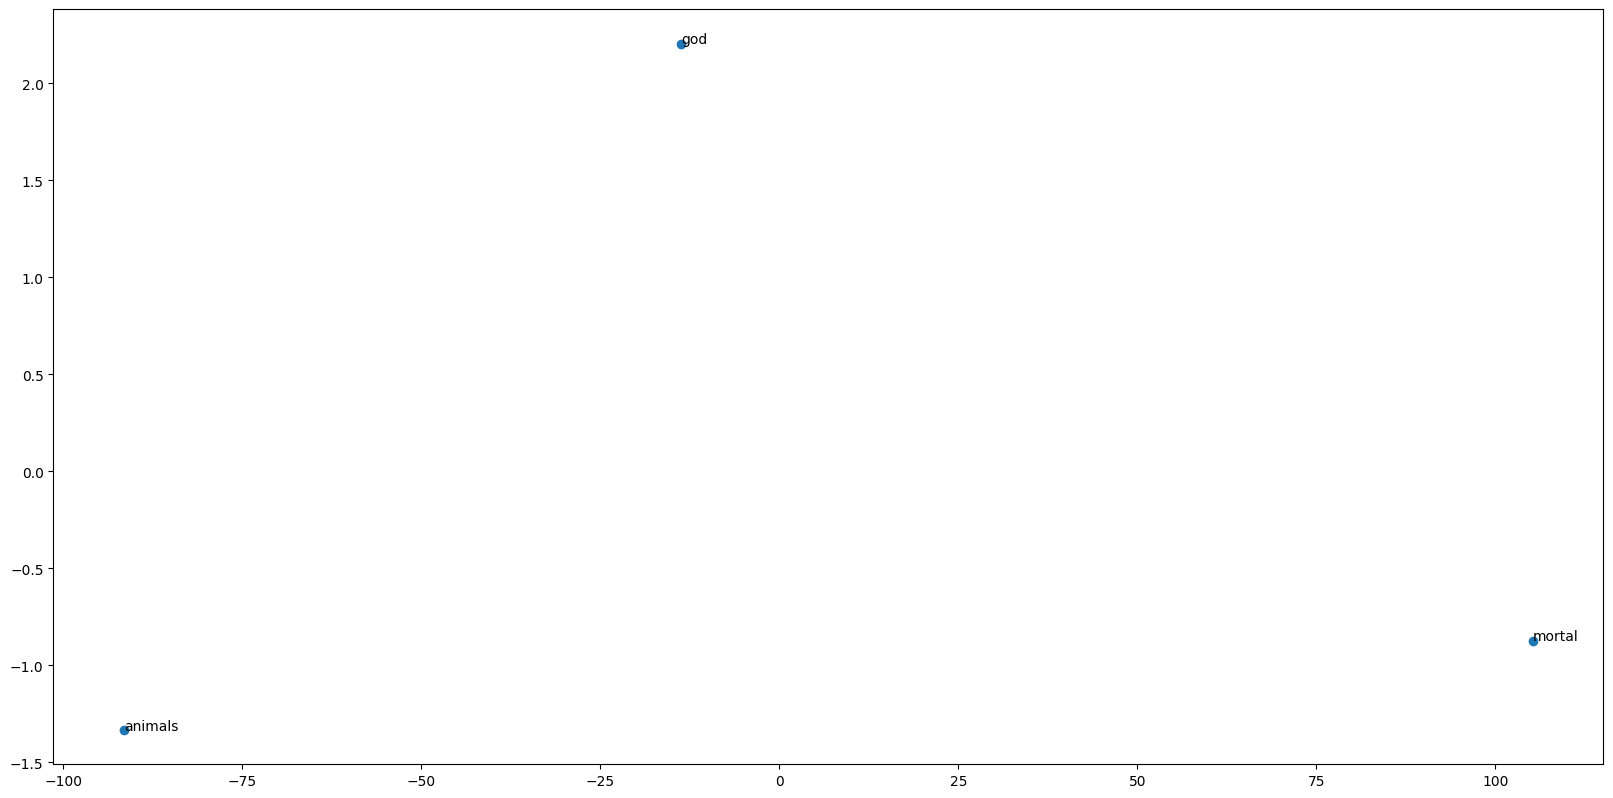

In [66]:
graph_pca_stuff(x_mortal_or_god, y_mortal_or_god, 100)


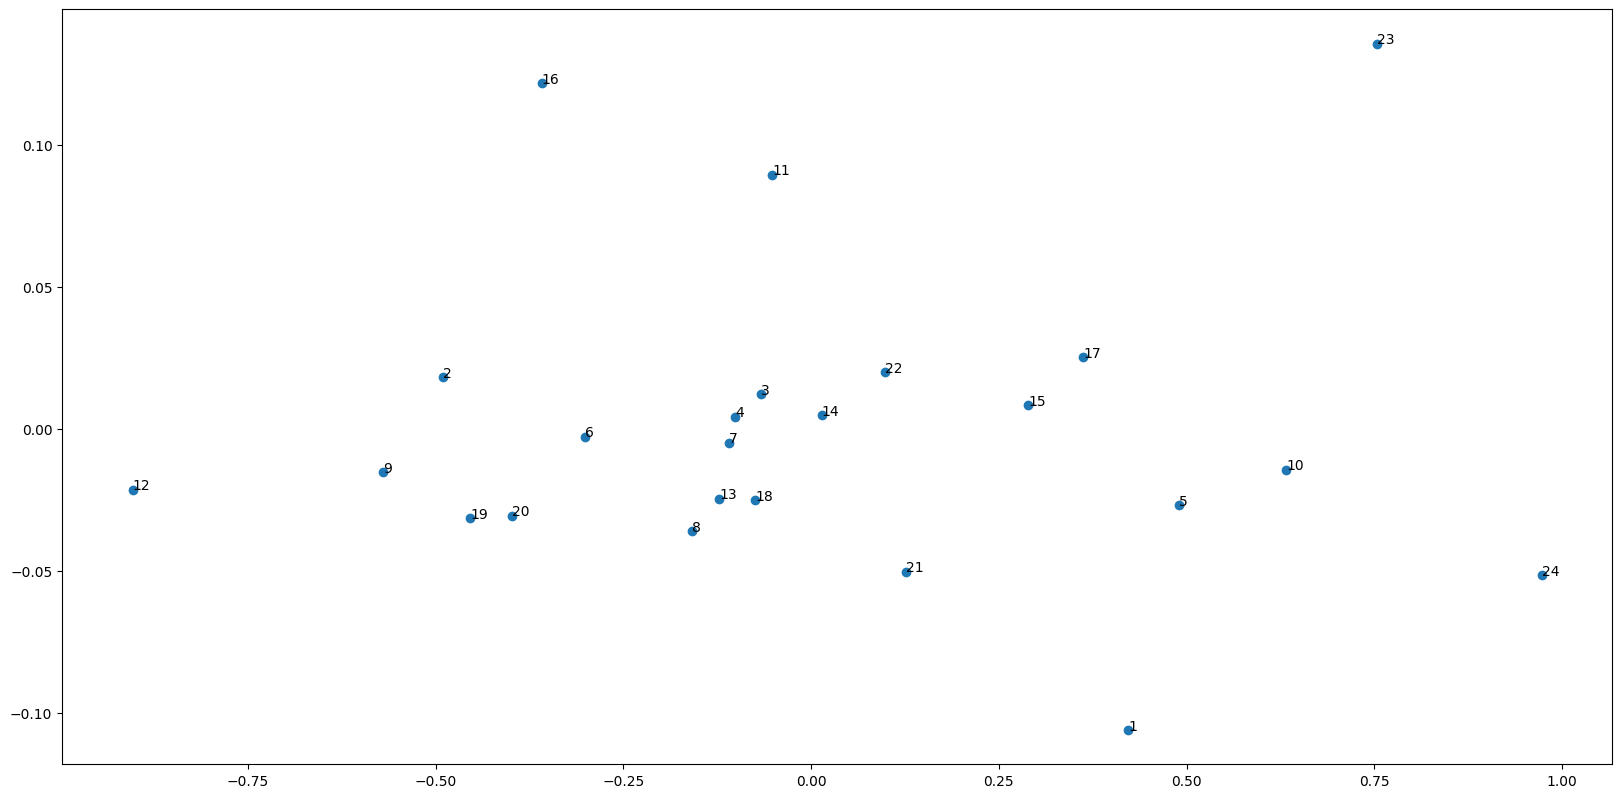

In [67]:
graph_pca_stuff(x_book, y_book, 100)

In [68]:
graph_pca_stuff(x_addressee, y_addressee, 1000)

In [69]:
# WITHOUT OUTLIERS
outliers_addressee = ["Achilles", "Greeks", "Hector", "Agamemnon", "Trojans"]
x_no_outliers_addressee = [x_addressee[i] for i in range(len(x_addressee)) if y_addressee[i] not in outliers_addressee ]
y_no_outliers_addressee = [elem for elem in y_addressee if elem not in outliers_addressee ]

graph_pca_stuff(x_no_outliers_addressee, y_no_outliers_addressee, 1000)


Output hidden; open in https://colab.research.google.com to view.

# Odessey only:

In [70]:
# print("ODYSSEY speakers: ")
# graph_pca_stuff(x_speaker, y_speaker, 1000)

In [71]:
# print("ODYSSEY mortal or god: ")
# graph_pca_stuff(ody_x_mortal_or_god, ody_y_mortal_or_god, 100)

In [72]:
# print("ODYSSEY book: ")
# graph_pca_stuff(ody_x_book, ody_y_book, 100)

In [73]:
# print("ODYSSEY addresse:")
# graph_pca_stuff(ody_x_addressee, ody_y_addressee, 1000)

# Iliad and Homeric Poems compared:

i.e. who speaks similarly, who is addressed similarly, mortal vs god similarities between texts

# Odessey and Homeric Poems compared:

i.e. who speaks similarly, who is addressed similarly, mortal vs god similarities between texts

# Odessey and Iliad compared:

i.e. who speaks similarly, who is addressed similarly, mortal vs god similarities between texts

# Odessey, Iliad, and Homeric Poems compared:

i.e. who speaks similarly, who is addressed similarly, mortal vs god similarities between texts